In [4]:
import os

os.makedirs("rice_ml", exist_ok=True)

with open("rice_ml/__init__.py", "w") as f:
    f.write("# rice_ml package")

In [2]:
logistic_code = """
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iter):
            linear = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear)
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear)
        return np.where(y_pred >= 0.5, 1, 0)
"""
with open("rice_ml/logistic_regression.py", "w") as f:
    f.write(logistic_code)


In [3]:
from rice_ml.logistic_regression import LogisticRegression
import numpy as np

X = np.array([[0.1], [0.3], [0.5], [0.9]])
y = np.array([0, 0, 1, 1])

model = LogisticRegression()
model.fit(X, y)
preds = model.predict(X)
print("Predictions:", preds)


Predictions: [0 1 1 1]


In [4]:

!zip -r rice_ml.zip rice_ml


  adding: rice_ml/ (stored 0%)
  adding: rice_ml/__pycache__/ (stored 0%)
  adding: rice_ml/__pycache__/__init__.cpython-311.pyc (deflated 25%)
  adding: rice_ml/__pycache__/logistic_regression.cpython-311.pyc (deflated 48%)
  adding: rice_ml/__init__.py (stored 0%)
  adding: rice_ml/logistic_regression.py (deflated 61%)


In [5]:
from google.colab import files
files.download("rice_ml.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:

import os
os.makedirs("rice_ml", exist_ok=True)


knn_code = """
import numpy as np
from collections import Counter

class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return Counter(k_nearest_labels).most_common(1)[0][0]
"""
with open("rice_ml/knn.py", "w") as f:
    f.write(knn_code)


In [7]:
from rice_ml.knn import KNearestNeighbors
import numpy as np


X_train = np.array([[0], [1], [2], [3]])
y_train = np.array([0, 0, 1, 1])

X_test = np.array([[1.1], [2.9]])

knn = KNearestNeighbors(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Predictions:", y_pred)


Predictions: [0 1]


In [8]:

lr_code = """
import numpy as np

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X_b = np.c_[np.ones((n_samples, 1)), X]
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.bias = theta_best[0]
        self.weights = theta_best[1:]

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
"""
with open("rice_ml/linear_regression.py", "w") as f:
    f.write(lr_code)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd


csv_path = "/content/drive/MyDrive/Colab Notebooks/ML_Rice_2025_Final_Project/uber.csv"

df = pd.read_csv(csv_path)
print("数据加载成功，前几行如下：")
df.head()


数据加载成功，前几行如下：


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
from rice_ml.linear_regression import LinearRegression
import numpy as np
import pandas as pd


df = df.copy()
df = df[(df['pickup_longitude'] != 0) & (df['dropoff_longitude'] != 0)]
df = df.dropna(subset=[
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
    'passenger_count', 'fare_amount', 'pickup_datetime'
])


df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df = df.dropna(subset=['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour


features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'hour']
X = df[features].values
y = df['fare_amount'].values


split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = np.mean((y_test - y_pred) ** 2)
print("Test MSE:", mse)


测试集上的均方误差 (MSE): 101.59671443292676


In [5]:
# perceptron
perceptron_code = """
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y <= 0, -1, 1)  # Perceptron expects labels in {-1, 1}

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                if y_[idx] * linear_output <= 0:
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)
"""
with open("rice_ml/perceptron.py", "w") as f:
    f.write(perceptron_code)


In [15]:
%%writefile rice_ml/perceptron.py

import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)
                if y_[idx] * linear_output <= 0:
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output > 0, 1, 0)


Overwriting rice_ml/perceptron.py


In [16]:
from google.colab import files
files.download("rice_ml/perceptron.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from google.colab import files
files.download("rice_ml/linear_regression.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Test Task Setup (Classification) - Perceptron model**

In [12]:
from rice_ml.perceptron import Perceptron
import numpy as np
import pandas as pd

# 5000
df_sample = df.copy()
df_sample = df_sample[(df_sample['pickup_longitude'] != 0) & (df_sample['dropoff_longitude'] != 0)]
df_sample = df_sample.dropna(subset=[
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
    'dropoff_longitude', 'passenger_count', 'fare_amount', 'pickup_datetime'
])

df_sample['pickup_datetime'] = pd.to_datetime(df_sample['pickup_datetime'], errors='coerce')
df_sample = df_sample.dropna(subset=['pickup_datetime'])
df_sample['hour'] = df_sample['pickup_datetime'].dt.hour

# ✅ 5000
df_sample = df_sample.sample(n=5000, random_state=42)


features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'hour']
X = df_sample[features].values
y = (df_sample['fare_amount'] > 15).astype(int).values  # High fare =1，others=0


n = len(X)
train_end = int(0.6 * n)
val_end = int(0.8 * n)

X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

model = Perceptron(learning_rate=0.01, n_iters=100)
model.fit(X_train, y_train)


y_val_pred = model.predict(X_val)
val_acc = np.mean(y_val_pred == y_val)
print("Validation Accuracy：", val_acc)


y_test_pred = model.predict(X_test)
test_acc = np.mean(y_test_pred == y_test)
print("Test Accuracy：", test_acc)


验证集准确率： 0.849
测试集准确率： 0.823


In [13]:
import os

# Create the rice_ml directory (if it doesn’t already exist)
os.makedirs("rice_ml", exist_ok=True)

# Write the metrics.py file
metrics_code = """
import numpy as np

# ✅ Classification tasks
def accuracy(y_true, y_pred):
    \"\"\"Compute classification accuracy.\"\"\"
    return np.mean(y_true == y_pred)

# ✅ Regression tasks
def mse(y_true, y_pred):
    \"\"\"Mean Squared Error (MSE).\"\"\"
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    \"\"\"Coefficient of determination (R²).\"\"\"
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot
"""

with open("rice_ml/metrics.py", "w") as f:
    f.write(metrics_code)


In [14]:
from google.colab import files
files.download("rice_ml/metrics.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import os

os.makedirs("rice_ml", exist_ok=True)

nn_code = """
import numpy as np

class SimpleNeuralNetwork:
    def __init__(self, input_dim, hidden_dim=10, learning_rate=0.01, n_iters=1000):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.lr = learning_rate
        self.n_iters = n_iters
        self._init_weights()

    def _init_weights(self):
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim) * 0.01
        self.b1 = np.zeros((1, self.hidden_dim))
        self.W2 = np.random.randn(self.hidden_dim, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def fit(self, X, y):
        y = y.reshape(-1, 1)
        for _ in range(self.n_iters):
            # Forward pass
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self.relu(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self.sigmoid(Z2)

            # Backward pass
            dZ2 = A2 - y
            dW2 = np.dot(A1.T, dZ2) / X.shape[0]
            db2 = np.mean(dZ2, axis=0, keepdims=True)

            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self.relu_derivative(Z1)
            dW1 = np.dot(X.T, dZ1) / X.shape[0]
            db1 = np.mean(dZ1, axis=0, keepdims=True)

            # Gradient descent
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

    def predict(self, X):
        A1 = self.relu(np.dot(X, self.W1) + self.b1)
        A2 = self.sigmoid(np.dot(A1, self.W2) + self.b2)
        return (A2 >= 0.5).astype(int).flatten()
"""

with open("rice_ml/neural_network.py", "w") as f:
    f.write(nn_code)


In [16]:
from rice_ml.neural_network import SimpleNeuralNetwork
from rice_ml.metrics import accuracy
import numpy as np
import pandas as pd


df_nn = df.copy()
df_nn = df_nn[(df_nn['pickup_longitude'] != 0) & (df_nn['dropoff_longitude'] != 0)]
df_nn = df_nn.dropna(subset=[
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
    'dropoff_longitude', 'passenger_count', 'fare_amount', 'pickup_datetime'
])
df_nn['pickup_datetime'] = pd.to_datetime(df_nn['pickup_datetime'], errors='coerce')
df_nn = df_nn.dropna(subset=['pickup_datetime'])
df_nn['hour'] = df_nn['pickup_datetime'].dt.hour


df_nn = df_nn.sample(n=5000, random_state=42)


features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
            'dropoff_longitude', 'passenger_count', 'hour']
X = df_nn[features].values
y = (df_nn['fare_amount'] > 15).astype(int).values


n = len(X)
train_end = int(0.6 * n)
val_end = int(0.8 * n)
X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]


model = SimpleNeuralNetwork(input_dim=X.shape[1], hidden_dim=10, learning_rate=0.01, n_iters=300)
model.fit(X_train, y_train)


y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

val_acc = accuracy(y_val, y_val_pred)
test_acc = accuracy(y_test, y_test_pred)

print("Validation Accuracy：", val_acc)
print("Test Accuracy：", test_acc)


验证集准确率： 0.849
测试集准确率： 0.823


In [17]:
import os
os.makedirs("rice_ml", exist_ok=True)

tree_code = """
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_one(x, self.root) for x in X])

    def _gini(self, y):
        classes = np.unique(y)
        impurity = 1.0
        for c in classes:
            p = np.sum(y == c) / len(y)
            impurity -= p ** 2
        return impurity

    def _best_split(self, X, y):
        best_idx, best_thresh, best_gain = None, None, 0
        n_samples, n_features = X.shape
        parent_impurity = self._gini(y)

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for t in thresholds:
                left = y[X[:, feature_idx] <= t]
                right = y[X[:, feature_idx] > t]
                if len(left) < self.min_samples_split or len(right) < self.min_samples_split:
                    continue
                left_impurity = self._gini(left)
                right_impurity = self._gini(right)
                weighted_impurity = (len(left)*left_impurity + len(right)*right_impurity) / len(y)
                gain = parent_impurity - weighted_impurity
                if gain > best_gain:
                    best_gain = gain
                    best_idx = feature_idx
                    best_thresh = t
        return best_idx, best_thresh

    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or depth >= self.max_depth or len(y) < self.min_samples_split:
            return {'leaf': True, 'label': np.bincount(y).argmax()}

        feat_idx, thresh = self._best_split(X, y)
        if feat_idx is None:
            return {'leaf': True, 'label': np.bincount(y).argmax()}

        left_mask = X[:, feat_idx] <= thresh
        right_mask = ~left_mask

        return {
            'leaf': False,
            'feature_index': feat_idx,
            'threshold': thresh,
            'left': self._build_tree(X[left_mask], y[left_mask], depth + 1),
            'right': self._build_tree(X[right_mask], y[right_mask], depth + 1)
        }

    def _predict_one(self, x, node):
        if node['leaf']:
            return node['label']
        if x[node['feature_index']] <= node['threshold']:
            return self._predict_one(x, node['left'])
        else:
            return self._predict_one(x, node['right'])
"""
with open("rice_ml/decision_tree.py", "w") as f:
    f.write(tree_code)


In [18]:
from rice_ml.decision_tree import DecisionTree
from rice_ml.metrics import accuracy
import numpy as np
import pandas as pd

# 1. Data preprocessing
df_tree = df.copy()
df_tree = df_tree[(df_tree['pickup_longitude'] != 0) & (df_tree['dropoff_longitude'] != 0)]
df_tree = df_tree.dropna(subset=[
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
    'dropoff_longitude', 'passenger_count', 'fare_amount', 'pickup_datetime'
])
df_tree['pickup_datetime'] = pd.to_datetime(df_tree['pickup_datetime'], errors='coerce')
df_tree = df_tree.dropna(subset=['pickup_datetime'])
df_tree['hour'] = df_tree['pickup_datetime'].dt.hour

# 2. Sample data to speed up training
df_tree = df_tree.sample(n=5000, random_state=42)

# 3. Define features and binary target (is high-fare ride?)
features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
            'dropoff_longitude', 'passenger_count', 'hour']
X = df_tree[features].values
y = (df_tree['fare_amount'] > 15).astype(int).values  # high fare = 1

# 4. Split into train/val/test sets
n = len(X)
train_end = int(0.6 * n)
val_end = int(0.8 * n)
X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

# 5. Train decision tree
tree = DecisionTree(max_depth=5, min_samples_split=10)
tree.fit(X_train, y_train)

# 6. Predict and evaluate
y_val_pred = tree.predict(X_val)
y_test_pred = tree.predict(X_test)

val_acc = accuracy(y_val, y_val_pred)
test_acc = accuracy(y_test, y_test_pred)

print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)


Validation Accuracy: 0.91
Test Accuracy: 0.906


In [19]:
import os

os.makedirs("rice_ml", exist_ok=True)

rf_code = """
import numpy as np
from rice_ml.decision_tree import DecisionTree
from collections import Counter

class RandomForest:
    def __init__(self, n_estimators=10, max_depth=5, min_samples_split=2, sample_ratio=0.8):
        # Initialize forest parameters
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.sample_ratio = sample_ratio
        self.trees = []

    def _bootstrap_sample(self, X, y):
        # Randomly sample data with replacement
        n_samples = int(len(X) * self.sample_ratio)
        indices = np.random.choice(len(X), n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        # Train each tree on a bootstrap sample
        self.trees = []
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Aggregate predictions from all trees
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = tree_preds.T  # shape: [n_samples, n_trees]
        return np.array([Counter(row).most_common(1)[0][0] for row in tree_preds])
"""

with open("rice_ml/random_forest.py", "w") as f:
    f.write(rf_code)


In [20]:
from rice_ml.random_forest import RandomForest
from rice_ml.metrics import accuracy
import numpy as np
import pandas as pd

# 1. Preprocess and sample data
df_rf = df.copy()
df_rf = df_rf[(df_rf['pickup_longitude'] != 0) & (df_rf['dropoff_longitude'] != 0)]
df_rf = df_rf.dropna(subset=[
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
    'dropoff_longitude', 'passenger_count', 'fare_amount', 'pickup_datetime'
])
df_rf['pickup_datetime'] = pd.to_datetime(df_rf['pickup_datetime'], errors='coerce')
df_rf = df_rf.dropna(subset=['pickup_datetime'])
df_rf['hour'] = df_rf['pickup_datetime'].dt.hour

# Sample 5000 rows for faster training
df_rf = df_rf.sample(n=5000, random_state=42)

# 2. Create features and binary target (is_high_fare)
features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
            'dropoff_longitude', 'passenger_count', 'hour']
X = df_rf[features].values
y = (df_rf['fare_amount'] > 15).astype(int).values

# 3. Split into train/val/test
n = len(X)
train_end = int(0.6 * n)
val_end = int(0.8 * n)
X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

# 4. Train Random Forest
rf = RandomForest(n_estimators=10, max_depth=6, min_samples_split=5)
rf.fit(X_train, y_train)

# 5. Predict and evaluate
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

val_acc = accuracy(y_val, y_val_pred)
test_acc = accuracy(y_test, y_test_pred)

print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)


Validation Accuracy: 0.928
Test Accuracy: 0.91


In [80]:
import os

os.makedirs("rice_ml", exist_ok=True)

tree_code = """
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        y = np.array(y, dtype=int).flatten()  # 强制转为整数型 numpy array
        self.root = self._build_tree(X, y, depth=0)

    def predict(self, X):
        return np.array([self._predict_one(x, self.root) for x in X])

    def _gini(self, y):
        classes = np.unique(y)
        impurity = 1.0
        for c in classes:
            p = np.sum(y == c) / len(y)
            impurity -= p ** 2
        return impurity

    def _best_split(self, X, y):
        best_idx, best_thresh, best_gain = None, None, 0
        n_samples, n_features = X.shape
        parent_impurity = self._gini(y)

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for t in thresholds:
                left = y[X[:, feature_idx] <= t]
                right = y[X[:, feature_idx] > t]
                if len(left) < self.min_samples_split or len(right) < self.min_samples_split:
                    continue
                left_impurity = self._gini(left)
                right_impurity = self._gini(right)
                weighted_impurity = (len(left) * left_impurity + len(right) * right_impurity) / len(y)
                gain = parent_impurity - weighted_impurity
                if gain > best_gain:
                    best_gain = gain
                    best_idx = feature_idx
                    best_thresh = t
        return best_idx, best_thresh

    def _build_tree(self, X, y, depth):
        y = np.array(y, dtype=int).flatten()  # 再次强制为整数型 numpy array

        if len(np.unique(y)) == 1 or depth >= self.max_depth or len(y) < self.min_samples_split:
            values, counts = np.unique(y, return_counts=True)
            majority_class = values[np.argmax(counts)]
            return {'leaf': True, 'label': majority_class}

        feat_idx, thresh = self._best_split(X, y)
        if feat_idx is None:
            values, counts = np.unique(y, return_counts=True)
            majority_class = values[np.argmax(counts)]
            return {'leaf': True, 'label': majority_class}

        left_mask = X[:, feat_idx] <= thresh
        right_mask = ~left_mask

        return {
            'leaf': False,
            'feature_index': feat_idx,
            'threshold': thresh,
            'left': self._build_tree(X[left_mask], y[left_mask], depth + 1),
            'right': self._build_tree(X[right_mask], y[right_mask], depth + 1)
        }

    def _predict_one(self, x, node):
        if node['leaf']:
            return node['label']
        if x[node['feature_index']] <= node['threshold']:
            return self._predict_one(x, node['left'])
        else:
            return self._predict_one(x, node['right'])


"""

with open("rice_ml/decision_tree.py", "w") as f:
    f.write(tree_code)


In [75]:
import importlib
import rice_ml.decision_tree
importlib.reload(rice_ml.decision_tree)


<module 'rice_ml.decision_tree' from '/content/rice_ml/decision_tree.py'>

In [1]:
import os

os.makedirs("rice_ml", exist_ok=True)

boosting_code = """
import numpy as np
from rice_ml.decision_tree import DecisionTree

class AdaBoost:
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.models = []
        self.alphas = []

    def fit(self, X, y):
        y_mapped = np.where(y == 0, -1, 1)
        n_samples = len(y)
        weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            stump = DecisionTree(max_depth=1)
            stump.fit(X, y)

            y_pred = stump.predict(X)
            y_pred = np.array(y_pred).astype(int)
            y_pred_mapped = np.where(y_pred == 0, -1, 1)

            error = np.sum(weights[y_pred_mapped != y_mapped])
            error = max(error, 1e-10)
            alpha = 0.5 * np.log((1 - error) / error)

            weights *= np.exp(-alpha * y_mapped * y_pred_mapped)
            weights /= np.sum(weights)

            self.models.append(stump)
            self.alphas.append(alpha)

    def predict(self, X):
        clf_preds = np.array([
            alpha * np.where(model.predict(X) == 0, -1, 1)
            for model, alpha in zip(self.models, self.alphas)
        ])
        final_pred = np.sign(np.sum(clf_preds, axis=0))
        return np.where(final_pred == -1, 0, 1)


"""

with open("rice_ml/boosting.py", "w") as f:
    f.write(boosting_code)


In [83]:
import importlib
import rice_ml.decision_tree
import rice_ml.boosting
importlib.reload(rice_ml.decision_tree)
importlib.reload(rice_ml.boosting)


from rice_ml.boosting import AdaBoost
from rice_ml.metrics import accuracy
import numpy as np
import pandas as pd

# 1. Preprocess and sample data
df_boost = df.copy()
df_boost = df_boost[(df_boost['pickup_longitude'] != 0) & (df_boost['dropoff_longitude'] != 0)]
df_boost = df_boost.dropna(subset=[
    'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
    'dropoff_longitude', 'passenger_count', 'fare_amount', 'pickup_datetime'
])
df_boost['pickup_datetime'] = pd.to_datetime(df_boost['pickup_datetime'], errors='coerce')
df_boost = df_boost.dropna(subset=['pickup_datetime'])
df_boost['hour'] = df_boost['pickup_datetime'].dt.hour

# Sample 5000 rows to speed up training
df_boost = df_boost.sample(n=5000, random_state=42)

# 2. Create features and binary label (is_high_fare)
features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
            'dropoff_longitude', 'passenger_count', 'hour']
X = df_boost[features].values
y = (df_boost['fare_amount'] > 15).astype(int).values

# 3. Split into train / validation / test sets
n = len(X)
train_end = int(0.6 * n)
val_end = int(0.8 * n)
X_train, X_val, X_test = X[:train_end], X[train_end:val_end], X[val_end:]
y_train, y_val, y_test = y[:train_end], y[train_end:val_end], y[val_end:]

# 4. Train AdaBoost classifier
boost = AdaBoost(n_estimators=20)
boost.fit(X_train, y_train)

# 5. Evaluate on validation and test sets
y_val_pred = boost.predict(X_val)
y_test_pred = boost.predict(X_test)

val_acc = accuracy(y_val, y_val_pred)
test_acc = accuracy(y_test, y_test_pred)

print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)


Validation Accuracy: 0.878
Test Accuracy: 0.85


In [84]:
import os

os.makedirs("rice_ml", exist_ok=True)

kmeans_code = """
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4, random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # Step 1: Initialize k random centroids from the data
        random_idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            # Step 2: Assign each sample to the nearest centroid
            distances = self._compute_distances(X)
            labels = np.argmin(distances, axis=1)

            # Step 3: Compute new centroids
            new_centroids = np.array([
                X[labels == j].mean(axis=0) if np.any(labels == j) else self.centroids[j]
                for j in range(self.k)
            ])

            # Step 4: Check for convergence
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break

            self.centroids = new_centroids

        self.labels_ = labels

    def predict(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

    def _compute_distances(self, X):
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
"""

with open("rice_ml/kmeans.py", "w") as f:
    f.write(kmeans_code)


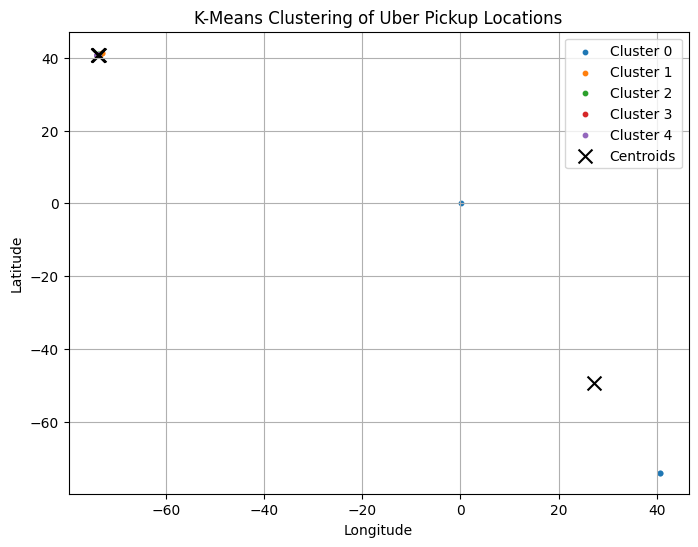

In [86]:
from rice_ml.kmeans import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Select pickup location data (latitude and longitude)
df_km = df.copy()
df_km = df_km[(df_km['pickup_longitude'] != 0) & (df_km['pickup_latitude'] != 0)]
df_km = df_km.dropna(subset=['pickup_latitude', 'pickup_longitude'])

# Sample 3000 points for faster visualization
df_km = df_km[['pickup_latitude', 'pickup_longitude']].sample(n=3000, random_state=42)
X = df_km.values

# Step 2: Train KMeans model
kmeans = KMeans(k=5, max_iters=100, tol=1e-4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.centroids

# Step 3: Visualize clustering results
plt.figure(figsize=(8, 6))
for i in range(kmeans.k):
    plt.scatter(X[labels == i][:, 1], X[labels == i][:, 0], label=f'Cluster {i}', s=10)

# Plot centroids
plt.scatter(centroids[:, 1], centroids[:, 0], color='black', marker='x', s=100, label='Centroids')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clustering of Uber Pickup Locations")
plt.legend()
plt.grid(True)
plt.show()


In [87]:
import os

os.makedirs("rice_ml", exist_ok=True)

dbscan_code = """
import numpy as np

class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        # eps: neighborhood radius
        # min_samples: minimum number of points to form a dense region
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None

    def fit(self, X):
        n = len(X)
        labels = -1 * np.ones(n, dtype=int)  # -1 means noise
        cluster_id = 0
        visited = np.zeros(n, dtype=bool)

        for i in range(n):
            if visited[i]:
                continue
            visited[i] = True
            neighbors = self._region_query(X, i)
            if len(neighbors) < self.min_samples:
                labels[i] = -1  # mark as noise
            else:
                self._expand_cluster(X, labels, i, neighbors, cluster_id, visited)
                cluster_id += 1

        self.labels_ = labels

    def _expand_cluster(self, X, labels, i, neighbors, cluster_id, visited):
        labels[i] = cluster_id
        queue = list(neighbors)
        while queue:
            j = queue.pop(0)
            if not visited[j]:
                visited[j] = True
                j_neighbors = self._region_query(X, j)
                if len(j_neighbors) >= self.min_samples:
                    queue.extend(j_neighbors)
            if labels[j] == -1:
                labels[j] = cluster_id

    def _region_query(self, X, idx):
        # Return indices of neighbors within eps distance
        distances = np.linalg.norm(X - X[idx], axis=1)
        return list(np.where(distances <= self.eps)[0])
"""

with open("rice_ml/dbscan.py", "w") as f:
    f.write(dbscan_code)


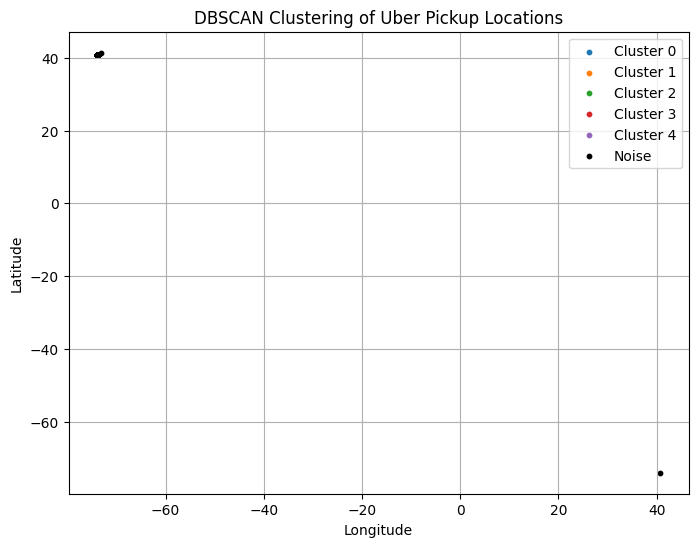

In [88]:
from rice_ml.dbscan import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Prepare latitude and longitude data
df_db = df.copy()
df_db = df_db[(df_db['pickup_latitude'] != 0) & (df_db['pickup_longitude'] != 0)]
df_db = df_db.dropna(subset=['pickup_latitude', 'pickup_longitude'])

# Sample 1000 points to reduce runtime
df_db = df_db[['pickup_latitude', 'pickup_longitude']].sample(n=1000, random_state=42)
X = df_db.values

# Step 2: Train DBSCAN model
model = DBSCAN(eps=0.01, min_samples=5)  # eps should be small for GPS data
model.fit(X)

# Step 3: Visualize clustering results
labels = model.labels_
unique_labels = set(labels)

plt.figure(figsize=(8, 6))
for label in unique_labels:
    if label == -1:
        # Noise points
        color = 'k'
        label_name = 'Noise'
    else:
        color = plt.cm.tab10(label % 10)
        label_name = f'Cluster {label}'
    plt.scatter(X[labels == label][:, 1], X[labels == label][:, 0],
                s=10, c=[color], label=label_name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Clustering of Uber Pickup Locations")
plt.legend()
plt.grid(True)
plt.show()


In [89]:
import os

os.makedirs("rice_ml", exist_ok=True)

pca_code = """
import numpy as np

class PCA:
    def __init__(self, n_components):
        # Number of principal components to keep
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None

    def fit(self, X):
        # Step 1: Center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_

        # Step 2: Compute covariance matrix
        cov = np.cov(X_centered, rowvar=False)

        # Step 3: Eigen decomposition of covariance matrix
        eigvals, eigvecs = np.linalg.eigh(cov)

        # Step 4: Sort eigenvectors by decreasing eigenvalues
        sorted_idx = np.argsort(eigvals)[::-1]
        eigvecs = eigvecs[:, sorted_idx]
        eigvals = eigvals[sorted_idx]

        # Step 5: Keep top n_components
        self.components_ = eigvecs[:, :self.n_components]

    def transform(self, X):
        # Project data onto principal components
        X_centered = X - self.mean_
        return np.dot(X_centered, self.components_)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
"""

with open("rice_ml/pca.py", "w") as f:
    f.write(pca_code)


<ipython-input-90-fc0555846098>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.6, cmap='viridis')


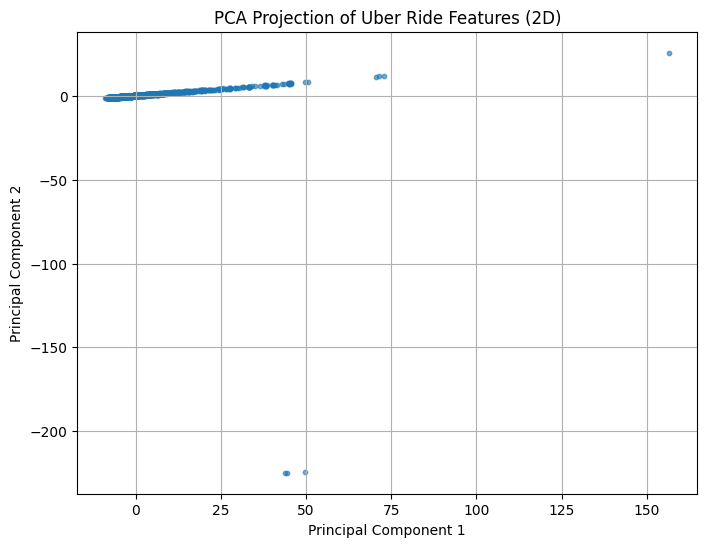

In [90]:
from rice_ml.pca import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Select numeric features for PCA
df_pca = df.copy()
df_pca = df_pca.dropna(subset=[
    'pickup_latitude', 'pickup_longitude',
    'dropoff_latitude', 'dropoff_longitude',
    'passenger_count', 'fare_amount', 'pickup_datetime'
])

# Extract hour from datetime
df_pca['pickup_datetime'] = pd.to_datetime(df_pca['pickup_datetime'])
df_pca['hour'] = df_pca['pickup_datetime'].dt.hour

# Step 2: Select features and sample 2000 rows for speed
features = ['pickup_latitude', 'pickup_longitude',
            'dropoff_latitude', 'dropoff_longitude',
            'passenger_count', 'fare_amount', 'hour']
X = df_pca[features].sample(n=2000, random_state=42).values

# Step 3: Fit PCA and transform data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Visualize 2D projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.6, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Uber Ride Features (2D)")
plt.grid(True)
plt.show()


In [91]:
from google.colab import files
files.download("rice_ml/neural_network.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
from google.colab import files
files.download("rice_ml/decision_tree.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
from google.colab import files
files.download("rice_ml/random_forest.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
from google.colab import files
files.download("rice_ml/boosting.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
from google.colab import files
files.download("rice_ml/kmeans.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
from google.colab import files
files.download("rice_ml/dbscan.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
from google.colab import files
files.download("rice_ml/pca.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>